# Looking at CIFAR10 data

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from importlib.util import find_spec
if find_spec("image_recognizer") is None:
    import sys
    sys.path.append("..")

from image_recognizer.data.cifar10 import CIFAR10

In [2]:
data = CIFAR10()
data.prepare_data()
data.setup()
print(data)

Files already downloaded and verified
Files already downloaded and verified
50000
CIFAR10 Dataset
Num classes 10
 Mapping: ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
 Dims: (3, 32, 32) 
Train/val/test sizes: 40000, 10000, 10000
Batch a stats: (torch.Size([128, 3, 32, 32]), torch.float32, tensor(-1.), tensor(0.0041), tensor(0.5036), tensor(1.))
Batch b stats: (torch.Size([128]), torch.float32, tensor(0.), tensor(4.3672), tensor(3.1042), tensor(9.))



In [3]:
x, y = next(iter(data.test_dataloader()))
print(x.shape, x.dtype, x.min(), x.mean(), x.std(), x.max())
print(y.shape, y.dtype, y.min(), y.max())

torch.Size([128, 3, 32, 32]) torch.float32 tensor(-1.) tensor(-0.0633) tensor(0.5116) tensor(1.)
torch.Size([128]) torch.int64 tensor(0) tensor(9)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


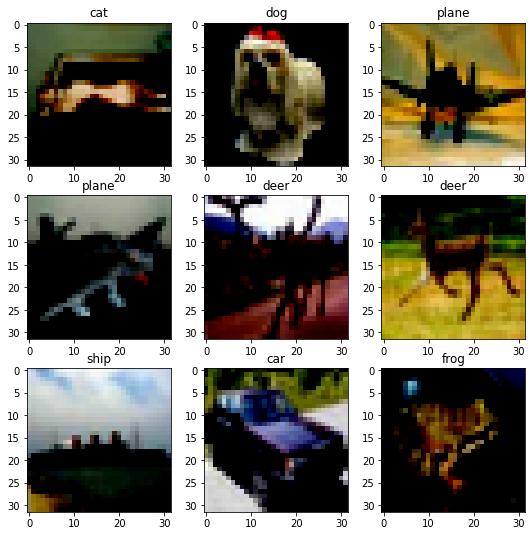

In [4]:
fig = plt.figure(figsize=(9, 9))
for idx in range(9):
    ax = fig.add_subplot(3, 3, idx+1)
    rand = np.random.randint(len(data.data_test))
    image, label = data.data_test[rand]
    ax.imshow(np.transpose(image, (1, 2, 0)), interpolation='nearest')
    ax.set_title(data.mapping[label])

# Train a CNN model

In [7]:
import pytorch_lightning as pl
from image_recognizer.models import CNN
from image_recognizer.lit_models import BaseLitModel

model = CNN(data_config=data.config())
lit_model = BaseLitModel(model=model)
trainer = pl.Trainer(gpus=1, max_epochs=5)
trainer.fit(lit_model, datamodule=data)

GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name      | Type     | Params
---------------------------------------
0 | model     | CNN      | 4.9 M 
1 | train_acc | Accuracy | 0     
2 | val_acc   | Accuracy | 0     
3 | test_acc  | Accuracy | 0     
---------------------------------------
4.9 M     Trainable params
0         Non-trainable params
4.9 M     Total params
Validation sanity check:   0%|          | 0/2 [00:00<?, ?it/s]/Users/jonasthrokso/miniconda/envs/adv-ml-swa_g/lib/python3.6/site-packages/pytorch_lightning/utilities/distributed.py:50: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)
Epoch 0:   0%|          | 0/392 [00:00<?, ?it/s] /Users/jonasthrokso/miniconda/envs/adv-ml-swa_g/lib/python3.6/s

1